In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from statistics import mode
import math

Explore data

In [3]:
df=pd.read_csv('/content/drive/MyDrive/AI/high.csv')
df2=pd.read_csv('/content/drive/MyDrive/AI/low.csv')


In [4]:
df

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28007,31/10/2022,141214,ASAS,2,1025509.50,1981726,25,0.52,1.55,2462.0,2.04,0.0
28008,31/10/2022,141215,UCIC,2,154.70,455,2,0.34,1.02,6959.0,1.52,14710.0
28009,31/10/2022,141223,SHBA,2,57426.99,10276,14,5.61,1.29,70.0,1.79,0.0
28010,31/10/2022,141224,NCCO,1,1135.00,500,1,2.27,1.00,500.0,1.50,500.0


In [5]:
df.describe(include='all')

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012,28012.000000,28012,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
unique,248,NaN,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,13/03/2022,NaN,JOIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,135,NaN,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,131287.967871,NaN,1.385906,6.312677e+04,4.270346e+04,28.061545,1.713816,1.620775,1.979999e+04,2.113421,2.452341e+04
std,NaN,9043.995400,NaN,0.750480,3.022558e+05,1.451785e+05,66.231007,4.667872,1.520599,6.742718e+04,1.500857,1.008184e+05
min,NaN,111001.000000,NaN,0.000000,2.000000e-02,1.000000e+00,1.000000,0.020000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,NaN,131052.000000,NaN,1.000000,6.398300e+02,1.000000e+03,3.000000,0.380000,1.050000,5.000000e+02,1.550000,4.000000e+02
50%,NaN,131243.000000,NaN,2.000000,3.831125e+03,5.873500e+03,9.000000,0.710000,1.180000,2.100000e+03,1.680000,1.912000e+03
75%,NaN,141014.000000,NaN,2.000000,2.014495e+04,2.843675e+04,25.000000,1.460000,1.550000,9.494250e+03,2.040000,1.038675e+04


<Axes: xlabel='MARKET', ylabel='count'>

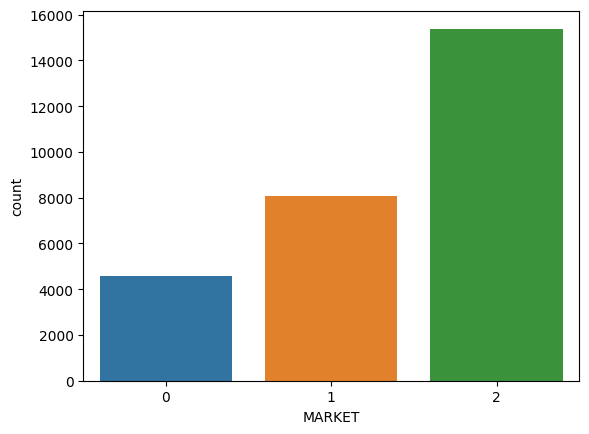

In [6]:
sns.countplot(x='MARKET',data=df)

In [7]:
mode=df['MARKET'].mode()[0]
print('mode for the MARKET column is Market number '+str(mode))

mode for the MARKET column is Market number 2


In [8]:
freq=df.groupby('MARKET').size()
print('frequency for each market'+str(freq))

frequency for each marketMARKET
0     4569
1     8064
2    15379
dtype: int64


In [9]:
sum=freq.sum()
sum

28012

In [10]:
RF=freq/sum*100
print('relative frequency for each market:'+str(RF))

relative frequency for each market:MARKET
0    16.310867
1    28.787662
2    54.901471
dtype: float64


In [11]:
val=freq.values
cm=val.cumsum()
print('cumulative frequency for MARKET column:\n'+'Market0 '+str(cm[0])+'\nMarket1 '+str(cm[1])+'\nMarket2 '+str(cm[2]))

cumulative frequency for MARKET column:
Market0 4569
Market1 12633
Market2 28012


(0.0, 1000.0)

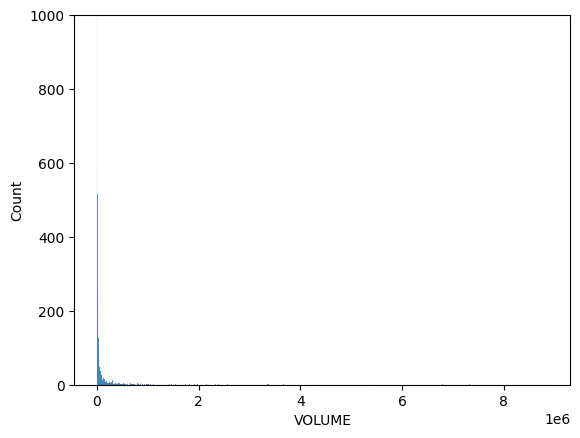

In [12]:
sc2=sns.histplot(x='VOLUME',data=df)
sc2.set_ylim(0,1000)

<Axes: xlabel='VOLUME'>

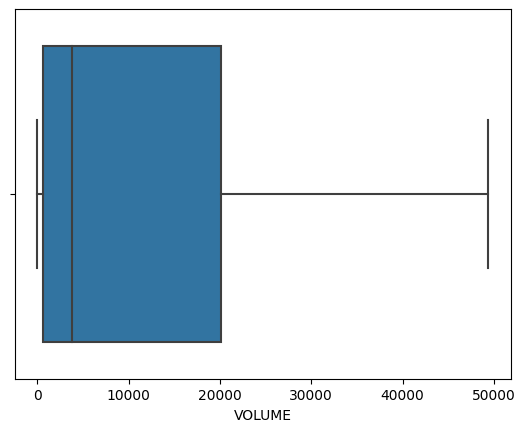

In [13]:
sns.boxplot(x='VOLUME',data=df,showfliers=False)

<Axes: xlabel='VOLUME'>

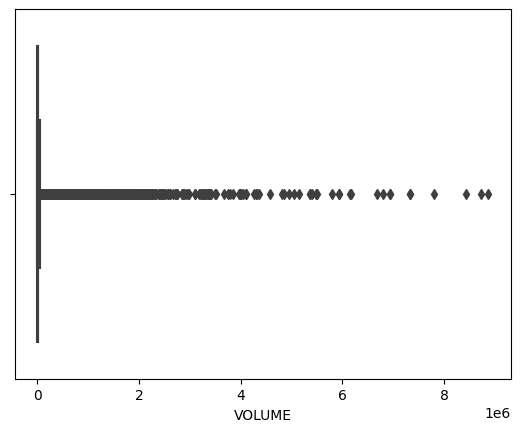

In [59]:
sns.boxplot(x='VOLUME',data=df)

<Axes: xlabel='BEST_BID_PRICE'>

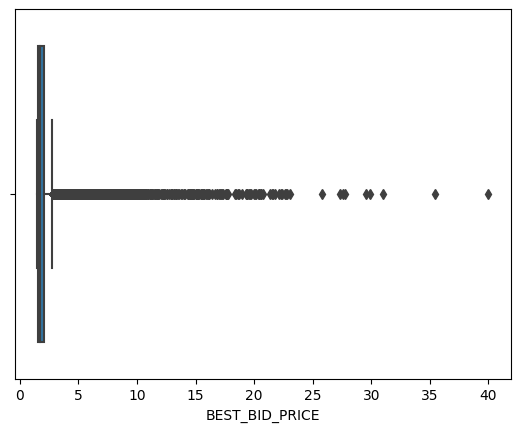

In [14]:
sns.boxplot(x='BEST_BID_PRICE',data=df)

<Axes: xlabel='BEST_BID_PRICE'>

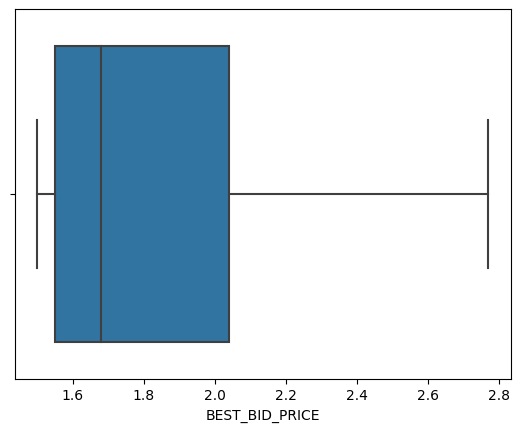

In [60]:
sns.boxplot(x='BEST_BID_PRICE',data=df,showfliers=False)

<Axes: xlabel='BEST_BID_PRICE', ylabel='Count'>

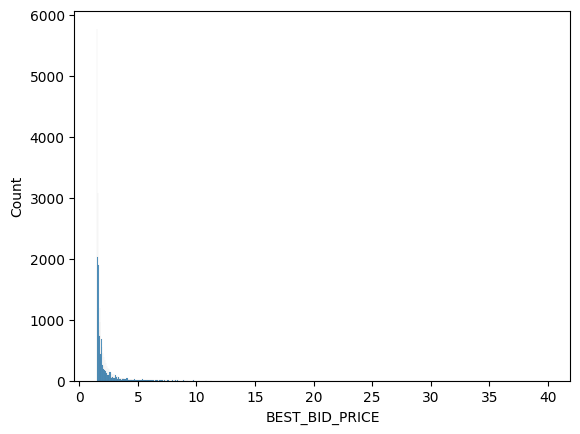

In [15]:
sns.histplot(x='BEST_BID_PRICE',data=df)

In [16]:
var=np.var(df['VOLUME'])
mean=np.mean(df['VOLUME'])
median=np.median(df['VOLUME'])
q1=np.quantile(df['VOLUME'],0.25)
q3=np.quantile(df['VOLUME'],0.75)
iqr=q3-q1
range=np.max(df['VOLUME'])-np.min(df['VOLUME'])
zscore=stats.zscore(df['VOLUME'])
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
outliers=(df['VOLUME']>upper) | (df['VOLUME']<lower)
print('Statistical summary of VOLUMEabout 1.7 column: ')
print('variance = '+str(var)+'\nRange = '+str(range)+'\nmedian = '+str(median)+'\nmean = '+str(mean)+'\nq1 = '+str(q1)+'\nq3 = '+str(q3)+'\ninterquartile range = '+str(iqr)+'\nz-score = '+str(zscore))

Statistical summary of VOLUMEabout 1.7 column: 
variance = 91355285832.59985
Range = 8868824.35
median = 3831.125
mean = 63126.7665386263
q1 = 639.83
q3 = 20144.947500000002
interquartile range = 19505.1175
z-score = 0        0.449816
1       -0.166812
2       -0.206449
3       -0.203701
4       -0.112806
           ...   
28007    3.184058
28008   -0.208344
28009   -0.018858
28010   -0.205101
28011    2.838312
Name: VOLUME, Length: 28012, dtype: float64


In [17]:
var2=np.var(df['BEST_BID_PRICE'])
mean2=np.mean(df['BEST_BID_PRICE'])
median2=np.median(df['BEST_BID_PRICE'])
q12=np.quantile(df['BEST_BID_PRICE'],0.25)
q32=np.quantile(df['BEST_BID_PRICE'],0.75)
iqr2=q32-q12
range2=np.max(df['BEST_BID_PRICE'])-np.min(df['BEST_BID_PRICE'])
zscore2=stats.zscore(df['BEST_BID_PRICE'])
upper2=q3+(1.5*iqr2)
lower2=q1-(1.5*iqr2)
outliers2=(df['BEST_BID_PRICE']>upper) | (df['BEST_BID_PRICE']<lower)
print('Statistical summary of BEST_BID_PRICE column:\n')
print('Range = '+str(range2)+'\nvariance = '+str(var2)+'\nmedian = '+str(median2)+'\nmean = '+str(mean2)+'\nq1 = '+str(q12)+'\nq3 = '+str(q32)+'\ninterquartile range = '+str(iqr2)+'\n\nz-score = '+str(zscore2))
math.sqrt(var2)

Statistical summary of BEST_BID_PRICE column:

Range = 38.5
variance = 2.252490778734207
median = 1.68
mean = 2.1134213908325004
q1 = 1.55
q3 = 2.04
interquartile range = 0.49

z-score = 0        0.677344
1       -0.168854
2       -0.315440
3       -0.348755
4       -0.255473
           ...   
28007   -0.048921
28008   -0.395395
28009   -0.215495
28010   -0.408721
28011    8.153207
Name: BEST_BID_PRICE, Length: 28012, dtype: float64


1.5008300299281752

In [18]:
contingency_table=pd.crosstab(
    index=df['MARKET'],
    columns=df['SYMBOL1'],
    margins=True
)
contingency_table

SYMBOL1,AAIN,AALU,ABCO,ABLA,ABMS,ABUS,ACDT,AEIN,AEIV,AHLI,...,UNAI,UNIN,UTOB,VFED,WIRE,WIVA,WOOD,ZARA,ZEIC,All
MARKET,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,190,0,0,0,169,0,0,...,0,0,0,0,0,0,2,0,0,4569
1,33,89,197,0,0,0,0,0,0,247,...,0,16,0,0,0,0,0,0,108,8064
2,0,26,0,0,14,223,128,0,214,0,...,246,0,195,60,205,175,0,106,0,15379
All,33,115,197,190,14,223,128,169,214,247,...,246,16,195,60,205,175,2,106,108,28012


In [19]:
row_percentages = df[['SYMBOL1','MARKET']].apply(lambda x: x.value_counts(normalize=True) * 100)
row_percentages

,SYMBOL1,MARKET
0,NaN,16.310867
1,NaN,28.787662
2,NaN,54.901471
AAIN,0.117807,NaN
AALU,0.410538,NaN
...,...,...
WIRE,0.731829,NaN
WIVA,0.624732,NaN
WOOD,0.007140,NaN
ZARA,0.378409,NaN


predictive model

In [20]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['TRADE_DATE']=label.fit_transform(df['TRADE_DATE'])
df['SYMBOL1']=label.fit_transform(df['SYMBOL1'])

df2['TRADE_DATE']=label.fit_transform(df2['TRADE_DATE'])
df2['SYMBOL1']=label.fit_transform(df2['SYMBOL1'])
df2

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,0,111001,107,1,199083.73,54378,73,3.65,2.65,585.0,3.13,2000.0
1,0,111002,112,1,12707.76,9009,17,1.41,1.36,493.0,1.86,1570.0
2,0,111003,87,2,727.41,726,7,1.00,1.14,1853.0,1.64,1000.0
3,0,111004,192,1,1558.10,394,5,3.95,1.09,660.0,1.59,46.0
4,0,111006,183,1,29030.98,14867,11,1.95,1.23,1000.0,1.73,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28007,247,141214,34,2,1025509.50,1981726,25,0.51,1.55,2462.0,2.04,0.0
28008,247,141215,200,2,154.70,455,2,0.34,1.02,6959.0,1.52,14710.0
28009,247,141223,178,2,57426.99,10276,14,5.35,1.29,70.0,1.79,0.0
28010,247,141224,151,1,1135.00,500,1,2.27,1.00,500.0,1.50,500.0


In [21]:
x=df.drop(['HIGH'],axis=1)
y=df['HIGH']
x2=df2.drop(['LOW'],axis=1)
y2=df2['LOW']
x2

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,0,111001,107,1,199083.73,54378,73,2.65,585.0,3.13,2000.0
1,0,111002,112,1,12707.76,9009,17,1.36,493.0,1.86,1570.0
2,0,111003,87,2,727.41,726,7,1.14,1853.0,1.64,1000.0
3,0,111004,192,1,1558.10,394,5,1.09,660.0,1.59,46.0
4,0,111006,183,1,29030.98,14867,11,1.23,1000.0,1.73,333.0
...,...,...,...,...,...,...,...,...,...,...,...
28007,247,141214,34,2,1025509.50,1981726,25,1.55,2462.0,2.04,0.0
28008,247,141215,200,2,154.70,455,2,1.02,6959.0,1.52,14710.0
28009,247,141223,178,2,57426.99,10276,14,1.29,70.0,1.79,0.0
28010,247,141224,151,1,1135.00,500,1,1.00,500.0,1.50,500.0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
# splitting data for the second dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.33, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg2=LinearRegression()
reg3=LinearRegression()

feature selection

In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
seq=SequentialFeatureSelector(estimator=reg,n_features_to_select=10)
X_Train_seq=seq.fit_transform(X_train,y_train)
seq.get_feature_names_out()

array(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY'], dtype=object)

In [25]:
from sklearn.feature_selection import SelectKBest
kbes=SelectKBest(k=8)
X_Train_kbest=kbes.fit_transform(X_train,y_train)
kbes.get_feature_names_out()

array(['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY'], dtype=object)

In [26]:
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold(threshold=0.8)
X_Train_var=var.fit_transform(X_train)
var.get_feature_names_out()

array(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY'], dtype=object)

In [27]:
reg.fit(X_Train_seq,y_train)
reg2.fit(X_Train_kbest,y_train)
reg3.fit(X_Train_var,y_train)

LinearRegression()

In [28]:
X_Test_seq=X_test[['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY']]

In [29]:
X_Test_kbest=X_test[['SEC_CODE', 'MARKET', 'VOLUME', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']]

In [30]:
X_Test_var=X_test[['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY']]

In [31]:
pred_seq=reg.predict(X_Test_seq)
pred_kbest=reg2.predict(X_Test_kbest)
pred_var=reg3.predict(X_Test_var)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [56]:
# metrics for the regression sequential feature selection

r2_seq=r2_score(y_test,pred_seq)
mae_seq=mean_absolute_error(y_test,pred_seq)
mse_seq=mean_squared_error(y_test,pred_seq)
rmse_seq=mean_squared_error(y_test,pred_seq,squared=False)

# metrics for the regression kbest feature selection

r2_kbest_reg=r2_score(y_test,pred_kbest)
mae_kbest_reg=mean_absolute_error(y_test,pred_kbest)
mse_kbest_reg=mean_squared_error(y_test,pred_kbest)
rmse_kbest_reg=mean_squared_error(y_test,pred_kbest,squared=False)

# metrics for the regression variance feature selection

r2_var_reg=r2_score(y_test,pred_var)
mae_var_reg=mean_absolute_error(y_test,pred_var)
mse_var_reg=mean_squared_error(y_test,pred_var)
rmse_var_reg=mean_squared_error(y_test,pred_var,squared=False)
print("metrics for regression kbest feature selection:"+"\nr2:"+str(r2_kbest_reg)+"\nmae:"+str(mae_kbest_reg)+"\nmse:"+str(mse_kbest_reg)+"\nrmse:"+str(rmse_kbest_reg)+'\n')
print("metrics for regression seq feature selection:"+"\nr2:"+str(r2_seq)+"\nmae:"+str(mae_seq)+"\nmse:"+str(mse_seq)+"\nrmse:"+str(rmse_seq)+'\n')
print("metrics for regression var feature selection:"+"\nr2:"+str(r2_var_reg)+"\nmae:"+str(mae_var_reg)+"\nmse:"+str(mse_var_reg)+"\nrmse:"+str(rmse_var_reg)+'\n')

metrics for regression kbest feature selection:
r2:0.14975175494408732
mae:1.627045367365005
mse:19.01456826136037
rmse:4.3605697175209075

metrics for regression seq feature selection:
r2:0.2086662102874416
mae:1.610466423407886
mse:17.69703195449812
rmse:4.206784039441307

metrics for regression var feature selection:
r2:0.20386128132146963
mae:1.6271879741192972
mse:17.80448721870564
rmse:4.219536374852768



KNN Regression

In [57]:
from sklearn.neighbors import KNeighborsRegressor

KNN_seq=KNeighborsRegressor(n_neighbors=5)
KNN_kbest=KNeighborsRegressor(n_neighbors=5)
KNN_var=KNeighborsRegressor(n_neighbors=5)

KNN_seq.fit(X_Train_seq,y_train)
KNN_kbest.fit(X_Train_kbest,y_train)
KNN_var.fit(X_Train_var,y_train)

pred_seq_knn=KNN_seq.predict(X_Test_seq)
pred_kbest_knn=KNN_kbest.predict(X_Test_kbest)
pred_var_knn=KNN_var.predict(X_Test_var)

# metrics for knn vseq feature selection

r2_seq_knn=r2_score(y_test,pred_seq_knn)
mae_seq_knn=mean_absolute_error(y_test,pred_seq_knn)
mse_seq_knn=mean_squared_error(y_test,pred_seq_knn)
rmse_seq_knn=mean_squared_error(y_test,pred_seq_knn,squared=False)

# metrics for knn kbest feature selection

r2_kbest_knn=r2_score(y_test,pred_kbest_knn)
mae_kbest_knn=mean_absolute_error(y_test,pred_kbest_knn)
mse_kbest_knn=mean_squared_error(y_test,pred_kbest_knn)
rmse_kbest_knn=mean_squared_error(y_test,pred_kbest_knn,squared=False)

# metrics for knn variance feature selection

r2_var_knn=r2_score(y_test,pred_var_knn)
mae_var_knn=mean_absolute_error(y_test,pred_var_knn)
mse_var_knn=mean_squared_error(y_test,pred_var_knn)
rmse_var_knn=mean_squared_error(y_test,pred_var_knn,squared=False)

print("metrics for knn kbest feature selection:"+"\nr2:"+str(r2_kbest_knn)+"\nmae:"+str(mae_kbest_knn)+"\nmse:"+str(mse_kbest_knn)+"\nrmse:"+str(rmse_kbest_knn)+'\n')
print("metrics for knn seq feature selection:"+"\nr2:"+str(r2_seq_knn)+"\nmae:"+str(mae_seq_knn)+"\nmse:"+str(mse_seq_knn)+"\nrmse:"+str(rmse_seq_knn)+'\n')
print("metrics for knn var feature selection:"+"\nr2:"+str(r2_var_knn)+"\nmae:"+str(mae_var_knn)+"\nmse:"+str(mse_var_knn)+"\nrmse:"+str(rmse_var_knn)+'\n')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


metrics for knn kbest feature selection:
r2:0.2873218790576062
mae:1.2419143228039808
mse:15.938012054521852
rmse:3.992243987348701

metrics for knn seq feature selection:
r2:0.9334695437348627
mae:0.3002998701860667
mse:1.4878571163998269
rmse:1.2197774864293187

metrics for knn var feature selection:
r2:0.9248827303983657
mae:0.3069361748160969
mse:1.6798887369104283
rmse:1.2961052183022905



Decision Tree Regression

In [58]:
from sklearn.tree import DecisionTreeRegressor

DTC_seq=DecisionTreeRegressor()
DTC_kbest=DecisionTreeRegressor()
DTC_var=DecisionTreeRegressor()

DTC_kbest.fit(X_Train_kbest,y_train)
DTC_seq.fit(X_Train_seq,y_train)
DTC_var.fit(X_Train_var,y_train)

pred_kbest_dtc=DTC_kbest.predict(X_Test_kbest)
pred_seq_dtc=DTC_seq.predict(X_Test_seq)
pred_var_dtc=DTC_var.predict(X_Test_var)

# metrics for Decision tree sequential feature selection

DTC_r2_seq=r2_score(y_test,pred_seq_dtc)
DTC_mae_seq=mean_absolute_error(y_test,pred_seq_dtc)
DTC_mse_seq=mean_squared_error(y_test,pred_seq_dtc)
DTC_rmse_seq=mean_squared_error(y_test,pred_seq_dtc,squared=False)

# metrics for Decision tree kbest feature selection

DTC_r2_kbest=r2_score(y_test,pred_kbest_dtc)
DTC_mae_kbest=mean_absolute_error(y_test,pred_kbest_dtc)
DTC_mse_kbest=mean_squared_error(y_test,pred_kbest_dtc)
DTC_rmse_kbest=mean_squared_error(y_test,pred_kbest_dtc,squared=False)

# metrics for Decision tree varirance feature selection

DTC_r2_var=r2_score(y_test,pred_var_dtc)
DTC_mae_var=mean_absolute_error(y_test,pred_var_dtc)
DTC_mse_var=mean_squared_error(y_test,pred_var_dtc)
DTC_rmse_var=mean_squared_error(y_test,pred_var_dtc,squared=False)

print("metrics for DTR kbest feature selection:"+"\nr2:"+str(DTC_r2_kbest)+"\nmae:"+str(DTC_mae_kbest)+"\nmse:"+str(DTC_mse_kbest)+"\nrmse:"+str(DTC_rmse_kbest)+'\n')
print("metrics for DTR seq feature selection:"+"\nr2:"+str(DTC_r2_seq)+"\nmae:"+str(DTC_mae_seq)+"\nmse:"+str(DTC_mse_seq)+"\nrmse:"+str(DTC_rmse_seq)+'\n')
print("metrics for DTR var feature selection:"+"\nr2:"+str(DTC_r2_var)+"\nmae:"+str(DTC_mae_var)+"\nmse:"+str(DTC_mse_var)+"\nrmse:"+str(DTC_rmse_var)+'\n')

metrics for DTR kbest feature selection:
r2:0.8545486080967006
mae:0.3677066205106015
mse:3.2528093249675467
rmse:1.8035546359807197

metrics for DTR seq feature selection:
r2:0.940292117223962
mae:0.22526395499783644
mse:1.3352801601038513
rmse:1.15554323160315

metrics for DTR var feature selection:
r2:0.931337967762383
mae:0.23861099091302465
mse:1.535526720034617
rmse:1.2391637180109079



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


predictive model for LOW dataset

In [35]:
from sklearn.feature_selection import SelectKBest
kbes=SelectKBest(k=10)
X_Train2_kbest=kbes.fit_transform(X_train2,y_train2)
kbes.get_feature_names_out()

array(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY'], dtype=object)

In [36]:
from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold(threshold=0.8)
X_Train2_var=var.fit_transform(X_train2)
var.get_feature_names_out()

array(['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY'], dtype=object)

In [37]:
from sklearn.feature_selection import SequentialFeatureSelector
seq=SequentialFeatureSelector(estimator=reg,n_features_to_select=10)
X_Train2_seq=seq.fit_transform(X_train2,y_train2)
seq.get_feature_names_out()

array(['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY'], dtype=object)

In [38]:
X_Test2_kbest=X_test2[['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY']]

X_Test2_var=X_test2[['TRADE_DATE', 'SEC_CODE', 'SYMBOL1', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY']]

X_Test2_seq=X_test2[['SEC_CODE', 'SYMBOL1', 'MARKET', 'VOLUME', 'TRADE_QTY',
       'NO_OF_TRADES', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE',
       'BEST_BID_QTY']]

In [39]:
reg4=LinearRegression()
reg5=LinearRegression()
reg6=LinearRegression()

In [40]:
reg4.fit(X_Train2_seq,y_train2)
reg5.fit(X_Train2_kbest,y_train2)
reg6.fit(X_Train2_var,y_train2)

LinearRegression()

In [41]:
pred2_seq=reg4.predict(X_Test2_seq)
pred2_kbest=reg5.predict(X_Test2_kbest)
pred2_var=reg6.predict(X_Test2_var)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [42]:
# metrics for the regression sequential feature selection

r2_seq2=r2_score(y_test2,pred2_seq)
mae_seq2=mean_absolute_error(y_test2,pred2_seq)
mse_seq2=mean_squared_error(y_test2,pred2_seq)
rmse_seq2=mean_squared_error(y_test2,pred2_seq,squared=False)

# metrics for the regression kbest feature selection

r2_kbest2_reg=r2_score(y_test2,pred2_kbest)
mae_kbest2_reg=mean_absolute_error(y_test2,pred2_kbest)
mse_kbest2_reg=mean_squared_error(y_test2,pred2_kbest)
rmse_kbest2_reg=mean_squared_error(y_test2,pred2_kbest,squared=False)

# metrics for the regression variance feature selection

r2_var2_reg=r2_score(y_test2,pred2_var)
mae_var2_reg=mean_absolute_error(y_test2,pred2_var)
mse_var2_reg=mean_squared_error(y_test2,pred2_var)
rmse_var2_reg=mean_squared_error(y_test2,pred2_var,squared=False)

In [43]:
KNN_seq2=KNeighborsRegressor(n_neighbors=5)
KNN_kbest2=KNeighborsRegressor(n_neighbors=5)
KNN_var2=KNeighborsRegressor(n_neighbors=5)

KNN_seq2.fit(X_Train2_seq,y_train2)
KNN_kbest2.fit(X_Train2_kbest,y_train2)
KNN_var2.fit(X_Train2_var,y_train2)

pred_seq_knn2=KNN_seq2.predict(X_Test2_seq)
pred_kbest_knn2=KNN_kbest2.predict(X_Test2_kbest)
pred_var_knn2=KNN_var2.predict(X_Test2_var)

# metrics for knn vseq feature selection

r2_seq_knn2=r2_score(y_test2,pred_seq_knn2)
mae_seq_knn2=mean_absolute_error(y_test2,pred_seq_knn2)
mse_seq_knn2=mean_squared_error(y_test2,pred_seq_knn2)
rmse_seq_knn2=mean_squared_error(y_test2,pred_seq_knn2,squared=False)

# metrics for knn kbest feature selection

r2_kbest_knn2=r2_score(y_test2,pred_kbest_knn2)
mae_kbest_knn2=mean_absolute_error(y_test2,pred_kbest_knn2)
mse_kbest_knn2=mean_squared_error(y_test2,pred_kbest_knn2)
rmse_kbest_knn2=mean_squared_error(y_test2,pred_kbest_knn2,squared=False)

# metrics for knn variance feature selection

r2_var_knn2=r2_score(y_test2,pred_var_knn2)
mae_var_knn2=mean_absolute_error(y_test2,pred_var_knn2)
mse_var_knn2=mean_squared_error(y_test2,pred_var_knn2)
rmse_var_knn2=mean_squared_error(y_test2,pred_var_knn2,squared=False)

#print('performance metrics')
#print('r2_score ='+str(max_r2)+'\nMean squared error ='+str(avg_mse)+'\nroot mean squared error ='+str(avg_rmse)+'\nmean absolute error ='+str(avg_mae))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [44]:
from sklearn.tree import DecisionTreeRegressor

DTC_seq2=DecisionTreeRegressor()
DTC_kbest2=DecisionTreeRegressor()
DTC_var2=DecisionTreeRegressor()

DTC_kbest2.fit(X_Train2_kbest,y_train2)
DTC_seq2.fit(X_Train2_seq,y_train2)
DTC_var2.fit(X_Train2_var,y_train2)

pred_kbest2_dtc=DTC_kbest2.predict(X_Test2_kbest)
pred_seq2_dtc=DTC_seq2.predict(X_Test2_seq)
pred_var2_dtc=DTC_var2.predict(X_Test2_var)

# metrics for Decision tree sequential feature selection

DTC_r2_seq2=r2_score(y_test2,pred_seq2_dtc)
DTC_mae_seq2=mean_absolute_error(y_test2,pred_seq2_dtc)
DTC_mse_seq2=mean_squared_error(y_test,pred_seq2_dtc)
DTC_rmse_seq2=mean_squared_error(y_test,pred_seq2_dtc,squared=False)

# metrics for Decision tree kbest feature selection

DTC_r2_kbest2=r2_score(y_test2,pred_kbest2_dtc)
DTC_mae_kbest2=mean_absolute_error(y_test2,pred_kbest2_dtc)
DTC_mse_kbest2=mean_squared_error(y_test2,pred_kbest2_dtc)
DTC_rmse_kbest2=mean_squared_error(y_test2,pred_kbest2_dtc,squared=False)

# metrics for Decision tree varirance feature selection

DTC_r2_var2=r2_score(y_test2,pred_var2_dtc)
DTC_mae_var2=mean_absolute_error(y_test2,pred_var2_dtc)
DTC_mse_var2=mean_squared_error(y_test2,pred_var2_dtc)
DTC_rmse_var2=mean_squared_error(y_test2,pred_var2_dtc,squared=False)

DTC_rmse_kbest2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


1.0271109859693441

In [45]:
col1=np.array(['seq', 'kbest', 'var','seq', 'kbest', 'var','seq', 'kbest', 'var'])
col2=np.array([r2_seq_knn,r2_kbest_knn,r2_var_knn,r2_seq,r2_kbest_reg,r2_var_reg,DTC_r2_seq,DTC_r2_kbest,DTC_r2_var])
col3=np.array(['knn','knn','knn','reg','reg','reg','DTR','DTR','DTR'])
df_vis=pd.DataFrame({'feature selection':col1,'r2':col2,'algorithm':col3})
df_vis

,feature selection,r2,algorithm
0,seq,0.933470,knn
1,kbest,0.287322,knn
2,var,0.924883,knn
3,seq,0.208666,reg
4,kbest,0.149752,reg
5,var,0.203861,reg
6,seq,0.939033,DTR
7,kbest,0.864974,DTR
8,var,0.940916,DTR


[Text(0.5, 1.0, 'High dataset')]

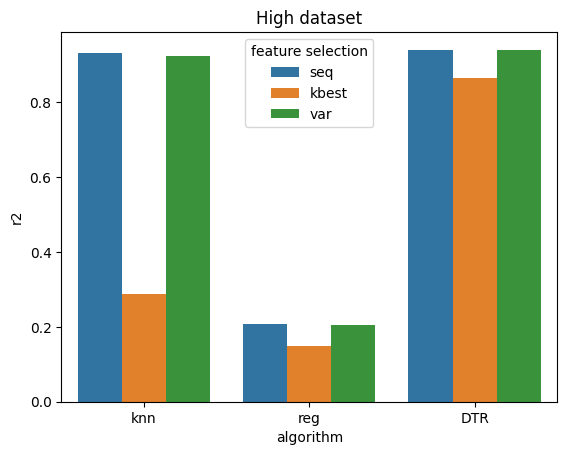

In [46]:
sns.barplot(x='algorithm',y='r2',hue='feature selection',data=df_vis).set(title='High dataset')

In [47]:
col1_mse=np.array(['seq', 'kbest', 'var','seq', 'kbest', 'var','seq', 'kbest', 'var'])
col2_mse=np.array([mse_seq_knn,mse_kbest_knn,mse_var_knn,mse_seq,mse_kbest_reg,mse_var_reg,DTC_mse_seq,DTC_mse_kbest,DTC_mse_var])
col3_mse=np.array(['knn','knn','knn','reg','reg','reg','DTR','DTR','DTR'])
df_vis2=pd.DataFrame({'feature selection':col1_mse,'mean squared error':col2_mse,'algorithm':col3_mse})
df_vis2

,feature selection,mean squared error,algorithm
0,seq,1.487857,knn
1,kbest,15.938012,knn
2,var,1.679889,knn
3,seq,17.697032,reg
4,kbest,19.014568,reg
5,var,17.804487,reg
6,seq,1.363448,DTR
7,kbest,3.019661,DTR
8,var,1.321325,DTR


[Text(0.5, 1.0, 'High dataset')]

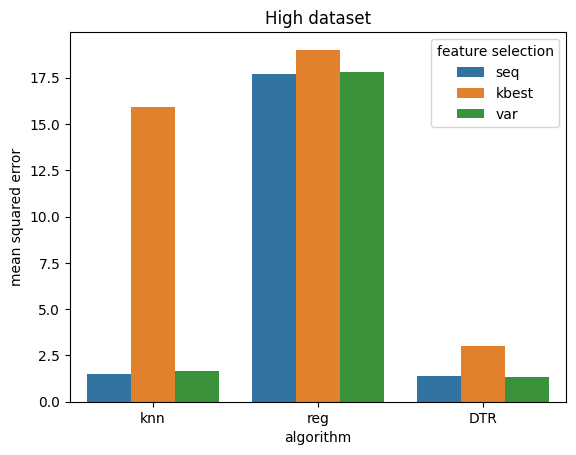

In [48]:
from matplotlib.pyplot import title
sns.barplot(x='algorithm',y='mean squared error',hue='feature selection',data=df_vis2).set(title='High dataset')

In [49]:
col1_mse2=np.array(['seq', 'kbest', 'var','seq', 'kbest', 'var','seq', 'kbest', 'var'])
col2_mse2=np.array([mse_seq_knn2,mse_kbest_knn2,mse_var_knn2,mse_seq2,mse_kbest2_reg,mse_var2_reg,DTC_mse_seq2,DTC_mse_kbest2,DTC_mse_var2])
col3_mse2=np.array(['knn','knn','knn','reg','reg','reg','DTR','DTR','DTR'])
df_vis3=pd.DataFrame({'feature selection':col1_mse2,'mean squared error':col2_mse2,'algorithm':col3_mse2})
df_vis3

,feature selection,mean squared error,algorithm
0,seq,1.412406,knn
1,kbest,1.412406,knn
2,var,1.597799,knn
3,seq,17.188922,reg
4,kbest,17.188922,reg
5,var,17.293919,reg
6,seq,1.066630,DTR
7,kbest,1.054957,DTR
8,var,1.364877,DTR


[Text(0.5, 1.0, 'LOW dataset')]

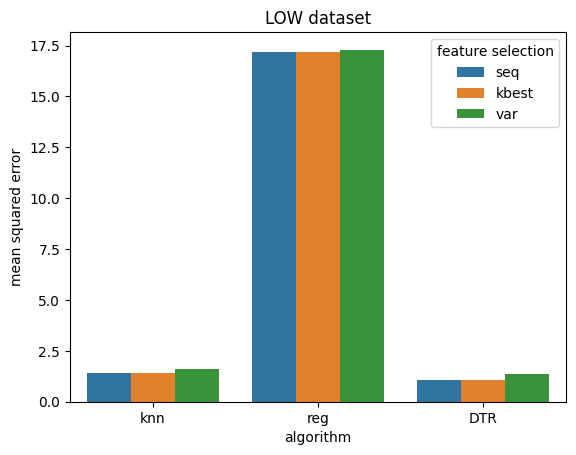

In [50]:
sns.barplot(x='algorithm',y='mean squared error',hue='feature selection',data=df_vis3).set(title='LOW dataset')

In [51]:
col1_r2=np.array(['seq', 'kbest', 'var','seq', 'kbest', 'var','seq', 'kbest', 'var'])
col2_r2=np.array([r2_seq_knn2,r2_kbest_knn2,r2_var_knn2,r2_seq2,r2_kbest2_reg,r2_var2_reg,DTC_r2_seq2,DTC_r2_kbest2,DTC_r2_var2])
col3_r2=np.array(['knn','knn','knn','reg','reg','reg','DTR','DTR','DTR'])
df_vis4=pd.DataFrame({'feature selection':col1_r2,'R2':col2_r2,'algorithm':col3_r2})
df_vis4

,feature selection,R2,algorithm
0,seq,0.934380,knn
1,kbest,0.934380,knn
2,var,0.925767,knn
3,seq,0.201411,reg
4,kbest,0.201411,reg
5,var,0.196533,reg
6,seq,0.952179,DTR
7,kbest,0.950987,DTR
8,var,0.936588,DTR


[Text(0.5, 1.0, 'LOW dataset')]

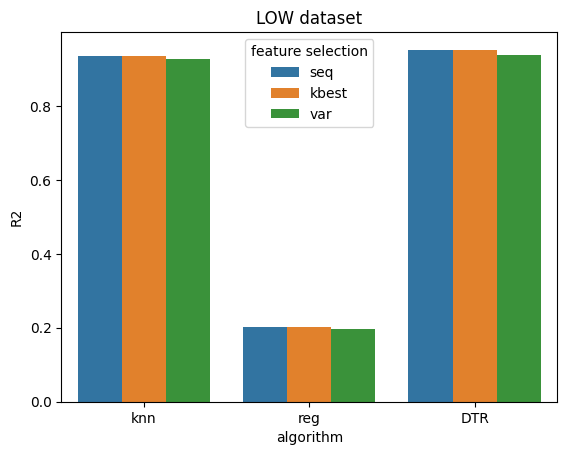

In [52]:
sns.barplot(x='algorithm',y='R2',hue='feature selection',data=df_vis4).set(title='LOW dataset')